In [5]:
import math
import matplotlib.pyplot as plt
from route_idfs import Database

MAX_DIST = 5 # metres
IMSIZE   = (360, 110)
FRSKIP   = 10

db = Database('newton/route1', size=IMSIZE, step=FRSKIP)

66 images loaded.


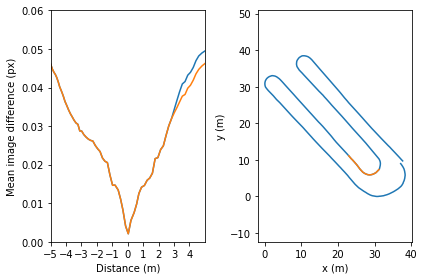

In [17]:
import navbench

START_FR = 5000
RIDF_STEP = 2

(lower, upper) = db.get_entry_bounds(MAX_DIST, START_FR)
dists = db.get_distances(lower, upper, START_FR)

# Load snapshot and test images
snap = db.read_images(START_FR)
images = db.read_images(lower, upper)
print(images.shape[2], "images loaded.")

fig, ax = plt.subplots(ncols=2)

# Show which part of route we're testing
x = db.entries["x"]
y = db.entries["y"]
ax[1].plot(x, y, x[lower:upper], y[lower:upper])
ax[1].set_xlabel("x (m)")
ax[1].set_ylabel("y (m)")
ax[1].axis("equal")

# Plot (R)IDF diffs vs distance
idf_diffs = navbench.get_route_idf(images, snap)
ridf_diffs = navbench.get_route_ridf(images, snap, RIDF_STEP)

ax[0].plot(dists, idf_diffs, dists, ridf_diffs)
ax[0].set_xlabel("Distance (m)")
ax[0].set_xlim(-MAX_DIST, MAX_DIST)
ax[0].set_xticks(range(-MAX_DIST, MAX_DIST))
ax[0].set_ylabel("Mean image difference (px)")
ax[0].set_ylim(0, 0.06)

# If we don't do this then the plots overlap
fig.tight_layout()

plt.show()